Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2023/2024  
http://www.fer.unizg.hr/predmet/map

### Prva laboratorijska vježba - Geometrija uzorka, multivarijatna normalna razdioba, statističko zaključivanje

**Rok za predaju: 4. travnja 2024. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje. 

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** 

**Na ovoj vježbi možete ostvariti ukupno 10 bodova. Vaša Jupyter bilježnica ocjenjivat će se s mogućnošću ostvarivanja do 6 bodova. Bodovi iz bilježnice bit će uneseni u sustav prije Vašeg termina usmene obrane, na kojoj možete ostvariti preostala 4 boda. Napominjemo da će se prilikom ocjenjivanja strogo provjeravati originalnost vaših rješenja. Predstavljanje tuđeg rada kao vlastitog je kršenje kodeksa ponašanja studenata i takvi slučajevi bit će prijavljeni povjerenstvu za stegovnu odgovornost.**

Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. Za ovu laboratorijsku vježbu, predaja Jupyter bilježnice i usmena obrana rješenja nisu obavezne. Možete predati bilježnicu bez dolaska na usmenu obranu, ali predaja bilježnice je nužan uvjet za usmenu obranu. Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [2]:
# Fiksirajte "seed" kako bi ispravno rekonstruirali i verificali eksperimente
# <Vaš kôd ovdje>

import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import scipy
from scipy import stats
import sklearn
from sklearn import datasets
from scipy.stats import shapiro

seed_value = 7621
np.random.seed(seed_value)


### 1. Geometrija uzorka i slučajno uzorkovanje

Neka je dan idući uzorak s $n = 4$ opservacije i $p = 3$ varijabli:

$$
\mathbf{X} = 
\begin{bmatrix}
10 & 3 & 2 \\
7 & 2 & 6 \\
8 & 1 & 3 \\ 
7 & 1 & 4  
\end{bmatrix}
$$

#### (a) 

Izračunajte i ispišite uzorački vektor srednjih vrijednosti $\overline{\mathbf{x}}$, uzoračku matricu kovarijance $\mathbf{S}$ i uzoračku matricu korelacije $\mathbf{R}$. 

In [2]:
# <Vaš kôd ovdje>
X = np.array([[10,3,2],
              [7,2,6],
              [8,1,3],
              [7,1,4]])

print("X:")
print(X)
print("---------")

x_sr = list()

for j in range (0,3) :

    sum = 0

    for i in range (0, 4) :
        #print(X[i][j])
        sum  = sum + X[i][j]
    
    x_sr.append(sum/4)

print("x_sr:")
x_sr = np.array(x_sr)
print(x_sr)
print("---------")

S = np.cov(X.T)
print("S:")
print(S)

print("---------")

R = np.corrcoef(X.T)
print("R:")
print(R)


X:
[[10  3  2]
 [ 7  2  6]
 [ 8  1  3]
 [ 7  1  4]]
---------
x_sr:
[8.   1.75 3.75]
---------
S:
[[ 2.          1.         -2.        ]
 [ 1.          0.91666667 -0.41666667]
 [-2.         -0.41666667  2.91666667]]
---------
R:
[[ 1.          0.73854895 -0.82807867]
 [ 0.73854895  1.         -0.2548236 ]
 [-0.82807867 -0.2548236   1.        ]]


Vizualizirajte graf raspršenja između prve i druge varijable, zatim prve i treće varijable. Usporedite grafove sa vrijednostima kovarijance i korelacije između tih varijabli.

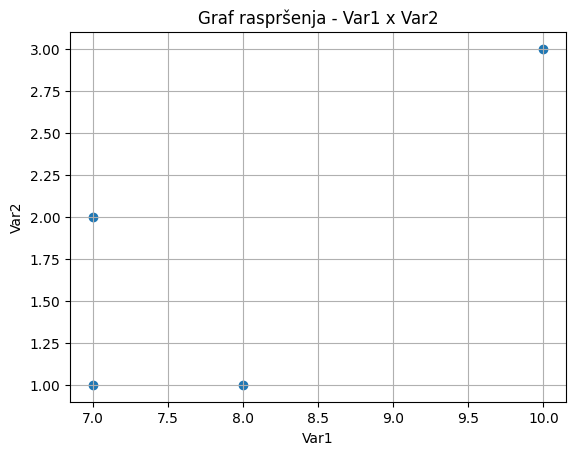

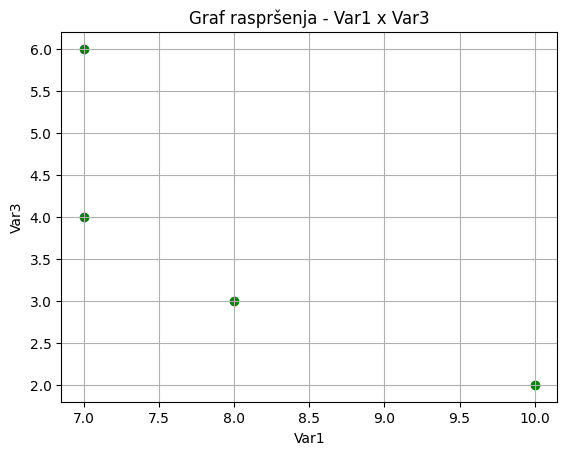

In [3]:
# <Vaš kôd ovdje>
var1 = np.array([10,7,8,7])
var2 = np.array([3,2,1,1])
var3 = np.array([2,6,3,4])

plt.scatter(var1, var2)
plt.xlabel("Var1")
plt.ylabel("Var2")
plt.title("Graf raspršenja - Var1 x Var2")
plt.grid(True)
plt.show()

plt.scatter(var1, var3,c="green")
plt.xlabel("Var1")
plt.ylabel("Var3")
plt.title("Graf raspršenja - Var1 x Var3")
plt.grid(True)
plt.show()


 Izračunajte statističku udaljenost:
 
 $$
 d\,(\mathbf{x}_1, \mathbf{x}_2) = ((\mathbf{x}_1 - \mathbf{x}_2)^\intercal \, \mathbf{S}^{-1} (\mathbf{x}_1 - \mathbf{x}_2)
 $$
  
 između prve i zadnje opservacije $d\,(\mathbf{x}_1, \mathbf{x}_4)$. Usporedite ju s euklidskom udaljenošću.

In [4]:
# <Vaš kôd ovdje>

observation1 = X[0]
observation4 = X[3]

print(observation1,observation4)

euclidean_dist1 = np.linalg.norm(observation4 - observation1)
euclidean_dist2 = np.sqrt(np.dot(observation1 - observation4,observation1 - observation4))

print("Euclidean distance: ", euclidean_dist1)
print("Euclidean distance 2 :", euclidean_dist2)

statistical_dist = np.dot(np.dot((observation1-observation4).T,np.linalg.inv(S)),(observation1-observation4)) 
print("Statistical distance: ", statistical_dist)


[10  3  2] [7 1 4]
Euclidean distance:  4.123105625617661
Euclidean distance 2 : 4.123105625617661
Statistical distance:  6.000000000000028


#### (b) 
Neka $\mathbf{x}_i \in \mathbb{R}^{n \times 1}$ predstavlja vektor vrijednosti varijable $i$  (iz uzorka $\mathbf{X}$), a $\overline{x}_i$ predstavlja uzoračku srednju vrijednost varijable $i$. Za svaku varijablu $i$, izračunajte vektor devijacija (reziduala) $\mathbf{d}_i = \mathbf{x}_i - \overline{x}_i \mathbf{1}$. Usporedite duljinu vektora devijacija sa standardnom devijacijom varijable.

----------------------------------------------------
Vektor reziduala - var 1:  [2.0, -1.0, 0.0, -1.0]
Vektor reziduala - var 2:  [1.25, 0.25, -0.75, -0.75]
Vektor reziduala - var 3:  [-1.75, 2.25, -0.75, 0.25]


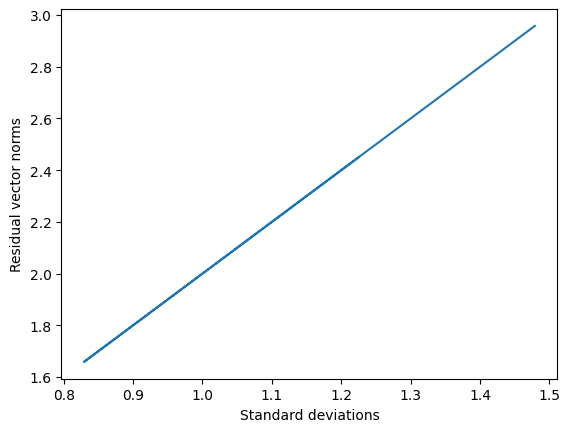

In [126]:
# <Vaš kôd ovdje>
vars = [var1,var2,var3]
deviation_vectors = list()

for index,var in enumerate(vars) :

    deviation_vector  = list()

    for value in var :

        deviation_vector.append(value - x_sr[index])

    #print(x_sr[index],var)
    deviation_vectors.append(deviation_vector)

print("----------------------------------------------------")
print("Vektor reziduala - var 1: ", deviation_vectors[0])
print("Vektor reziduala - var 2: ", deviation_vectors[1])
print("Vektor reziduala - var 3: ", deviation_vectors[2])

stds = [np.std(var1),np.std(var2),np.std(var3)]
norms = [np.linalg.norm(deviation_vectors[0]),np.linalg.norm(deviation_vectors[1]),np.linalg.norm(deviation_vectors[2])]

plt.plot(stds,norms)
plt.xlabel("Standard deviations")
plt.ylabel("Residual vector norms")
plt.show()


#### (c) 
Preko izračunatih vektora devijacija $\mathbf{d}_i$ rekonstruirajte matricu kovarijance $\mathbf{S}$, a zatim i matricu korelacije $\mathbf{R}$. Dokažite da su rekonstruirane matrice jednake gore izračunatima.

In [6]:
# <Vaš kôd ovdje>

dv_as_matrix = np.array(deviation_vectors)
covariance_matrix2 = np.cov(dv_as_matrix)

print(covariance_matrix2)

m = 4
print("---------------------------------------------------")
covariance_matrix2_2nd_approach = 1/(m-1) * np.dot(dv_as_matrix,dv_as_matrix.T)
print(covariance_matrix2_2nd_approach)

[[ 2.          1.         -2.        ]
 [ 1.          0.91666667 -0.41666667]
 [-2.         -0.41666667  2.91666667]]
---------------------------------------------------
[[ 2.          1.         -2.        ]
 [ 1.          0.91666667 -0.41666667]
 [-2.         -0.41666667  2.91666667]]


#### (d) 
Izračunajte uzoračku generaliziranu varijancu $|\mathbf{S}|$ uzorka $\mathbf{X}$. Zatim dodajte novu varijablu koja je linearna kombinacija prve i druge varijable $\mathbf{x}_3 = \mathbf{x}_0 + \mathbf{x}_1$. Izračunajte uzoračku generaliziranu varijancu na novom uzorku.

In [16]:
# <Vaš kôd ovdje>
sample_generalized_variance = np.linalg.det(S)
print("|S|:",sample_generalized_variance)

var4 = var1 + var2
print("Var4:",var4)

new_X = np.array([[10,3,2,13],
                  [7,2,6,9],
                  [8,1,3,9],
                  [7,1,4,8]])

new_S = np.cov(new_X.T)

print(f"New |S|:{np.linalg.det(new_S):.4f}") 


|S|: 0.08333333333333307
Var4: [13  9  9  8]
New |S|:-0.0000


Maknite zadnju opservaciju iz originalnog uzorka $\mathbf{X}$. Izračunajte uzoračku generaliziranu varijancu i svojstvene vektore na novom uzorku. Što možete zaključiti iz ovog i prethodnog primjera?

In [60]:
# <Vaš kôd ovdje>
new_X2 = np.array([[10,3,2],
                    [7,2,6],
                    [8,1,3]])

new_S2 = np.cov(new_X2.T)

print("New |S2|:",np.linalg.det(new_S2))

eigenvalues, eigenvectors = np.linalg.eig(new_S2)

print("Eigenvalues:",eigenvalues)
print("--------------------------------------------------")
print("Eigenvectors:")
print(eigenvectors)

New |S2|: -1.197299340282029e-16
Eigenvalues: [6.51557949e+00 5.73199098e-16 1.15108718e+00]
--------------------------------------------------
Eigenvectors:
[[-0.58069605 -0.73786479  0.34401694]
 [-0.17731308  0.52704628  0.83113314]
 [ 0.79457673 -0.42163702  0.43688677]]


### 2. Multivarijatna normalna razdioba

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe određene parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 6^2 \\
\end{bmatrix}
$$

In [13]:
# <Vaš kôd ovdje>
means = np.array([[2,3]])
sigma_cov = np.array([[100,36],[36,36]])
#print(means,sigma_cov)

n_samples = 1000
data = np.random.multivariate_normal(means.flatten(), sigma_cov, size=n_samples)


#### (a) 

Prikažite graf raspršenja dviju varijabli. Na istom grafu prikažite gustoću razdiobe uz pomoć elipsi za nekoliko različitih veličina $c^2$, gdje su točke $\mathbf{x}$ sve točke koje imaju jednaku udaljenost $c^2$ od središta $\mathbf{\mu}$:

$$
c^2 =(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})
$$
Pripazite da osi grafa budu na istoj skali.

**Hint**: Pogledajte `contour` funkciju u R-u, ili `plt.contour` funkciju u Pythonu (`matplotlib` biblioteka)

/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_94439/4262791776.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma_cov))) * np.exp(-0.5 * np.dot(np.dot((point - means), np.linalg.inv(sigma_cov)), (point - means).T))


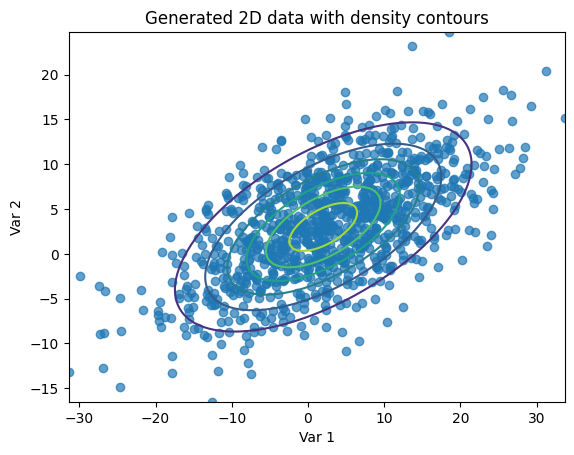

In [64]:
# <Vaš kôd ovdje>
plt.scatter(data[:, 0], data[:, 1],alpha=0.7)
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.title('Generated 2D data with density contours')

x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
y = np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma_cov))) * np.exp(-0.5 * np.dot(np.dot((point - means), np.linalg.inv(sigma_cov)), (point - means).T))

plt.contour(X, Y, Z)

plt.show()

#### (b)

Prikažite tri grafa raspršenja i pripadajućih elipsi uzorkovanjem iz multivarijatne normalne razdiobe s istim $\mu$ iz prošlog podzadatka i različitim matricama kovarijanci:

$$
\mathbf{\Sigma_1} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 10^2 \\
\end{bmatrix},
\mathbf{\Sigma_2} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
\mathbf{\Sigma_3} = 
\begin{bmatrix}
10^2 & 8^2 \\
8^2 & 6^2 \\
\end{bmatrix}
$$
Ukoliko nije moguće prikazati grafove raspršenja, pokažite zašto.

/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_94439/3175660151.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(newsigma))) * np.exp(-0.5 * np.dot(np.dot((point - means), np.linalg.inv(newsigma)), (point - means).T))


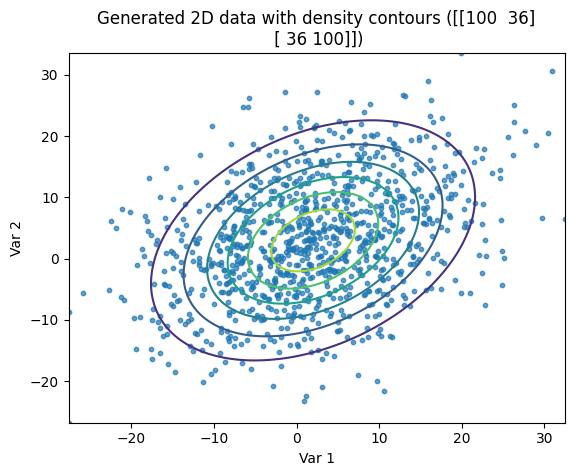

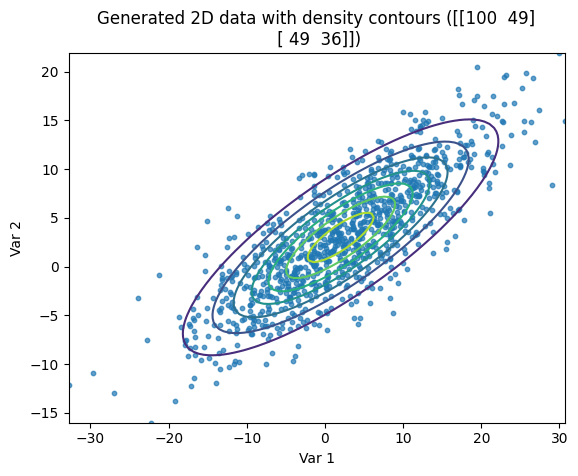

/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_94439/3175660151.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  newData = np.random.multivariate_normal(means.flatten(), newsigma, size=n_samples)
/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_94439/3175660151.py:25: RuntimeWarning: invalid value encountered in sqrt
  Z[i, j] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(newsigma))) * np.exp(-0.5 * np.dot(np.dot((point - means), np.linalg.inv(newsigma)), (point - means).T))


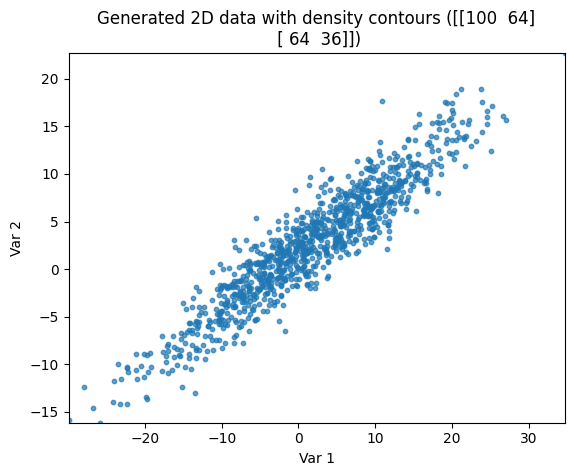

In [93]:
# <Vaš kôd ovdje>
newSigma1 = np.array([[100,36],[36,100]])
newSigma2 = np.array([[100,49],[49,36]])
newSigma3 = np.array([[100,64],[64,36]]) # trebaju biti "hiperbole" (determinanta < 0)

sigmas = [newSigma1,newSigma2,newSigma3]

for newsigma in sigmas :

    newData = np.random.multivariate_normal(means.flatten(), newsigma, size=n_samples)

    plt.scatter(newData[:, 0], newData[:, 1],alpha=0.7, s=10)
    plt.xlabel('Var 1')
    plt.ylabel('Var 2')
    plt.title('Generated 2D data with density contours ({})'.format(newsigma))

    x = np.linspace(newData[:, 0].min(), newData[:, 0].max(), 100)
    y = np.linspace(newData[:, 1].min(), newData[:, 1].max(), 100)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(newsigma))) * np.exp(-0.5 * np.dot(np.dot((point - means), np.linalg.inv(newsigma)), (point - means).T))
      
    plt.contour(X, Y, Z) 

    plt.show()

#### (c)

Promatramo $\mathbf{\Sigma}_1$ i $\mathbf{\Sigma}_2$ iz prošlog podzadatka. Neka su $\mathbf{X}_1 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_1)}$ i $\mathbf{X}_2 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_2)}$ slučajni dvo-dimenzionalni vektori, i neka je $\mathbf{X}_r$ slučajni vektor određen izrazom $\mathbf{X}_r = \mathbf{X}_1 - \mathbf{X}_2$. Odredite populacijske parametre koji određuju $\mathbf{X}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_r, \mathbf{\Sigma}_r)$.

In [94]:
# <Vaš kôd ovdje>

np.random.seed(seed_value)

random_vector1 = np.random.multivariate_normal(means.flatten(), newSigma1)
random_vector2 = np.random.multivariate_normal(means.flatten(), newSigma2)

print(random_vector1)
print(random_vector2)

vector3 = random_vector1 - random_vector2
print("X1-X2:",vector3)

v3_mean = means[0][0] - means[0][1]
v3_sigma = newSigma1 + newSigma2

print("Parameters of vector3: mu1 - mu2 , sigma1 + sigma2")
print(v3_mean)
print("---------")
print(v3_sigma)

[24.22267491 20.21701226]
[-8.60339489 -2.36841862]
X1-X2: [32.8260698  22.58543088]
Parameters of vector3: mu1 - mu2 , sigma1 + sigma2
-1
---------
[[200  85]
 [ 85 136]]


Procjenite iste te parametre uzorkovanjem $n=10^7$ opservacija iz $\mathbf{X_1}$ i $\mathbf{X_2}$.

In [98]:
# <Vaš kôd ovdje>
n = 10**7

np.random.seed(seed_value)

X1_samples = np.random.multivariate_normal(means.flatten(), newSigma1, size=n)
X2_samples = np.random.multivariate_normal(means.flatten(), newSigma2, size=n)

X1_mean = np.mean(X1_samples, axis=0)
X2_mean = np.mean(X2_samples, axis=0)

X1_sigm = np.cov(X1_samples, rowvar=False)
X2_sigm = np.cov(X2_samples, rowvar=False)

X_diff_mean_est = X1_mean - X2_mean
X_sigma_sum_est = X1_sigm + X2_sigm

print("Estimated mean difference:")
print(X_diff_mean_est)
print("----------------------------------------")
print("Estimated covariance sum:")
print(X_sigma_sum_est)



Estimated mean difference:
[ 0.00209843 -0.00168881]
----------------------------------------
Estimated covariance sum:
[[200.01795531  84.97585389]
 [ 84.97585389 136.012977  ]]


Procjenite parametre procjenitelja $\overline{\mathbf{X}}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_1, (1/n)\mathbf{\Sigma}_1)$ uzorkovanjem iz $\mathbf{X_1}$ i $\mathbf{X_2}$ na sljedeći način: generirajte $K = 10^5$ uzoraka, gdje svaki uzorak ima $n = 100$ opservacija.

In [148]:
# <Vaš kôd ovdje>
K = 10**5
n2 = 100

np.random.seed(seed_value)

X1_samples2 = np.random.multivariate_normal(means.flatten(), newSigma1, size=(K, n2))
X2_samples2 = np.random.multivariate_normal(means.flatten(), newSigma2, size=(K, n2))

X1_mean2 = np.mean(X1_samples2, axis=1)
X2_mean2 = np.mean(X2_samples2, axis=1)

X_diff_mean_est2 = X1_mean2 - X2_mean2
X_sigma_sum_est2 = (1/n2) * (newSigma1 + newSigma2)

print(X1_samples2.shape)
print("----------------")
print("Estimated mean difference:")
print(X_diff_mean_est2)
print("----------------------------------------")
print("Estimated covariance:")
print(X_sigma_sum_est2)


(100000, 100, 2)
----------------
Estimated mean difference:
[[ 0.5629518  -1.96397765]
 [-0.16385169  0.33673275]
 [-0.8578724   1.08019597]
 ...
 [-0.45071944 -0.14366567]
 [-1.64126843 -2.00819536]
 [-2.31542258 -1.73969946]]
----------------------------------------
Estimated covariance:
[[2.   0.85]
 [0.85 1.36]]


### 3. Statističko zaključivanje

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe s parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
$$

In [70]:
# <Vaš kôd ovdje>
np.random.seed(seed_value)

means2 = np.array([[2,3]])
sigma_cov2 = np.array([[100,49],[49,36]])
#print(means,sigma_cov)

n_samples2 = 1000
data = np.random.multivariate_normal(means.flatten(), sigma_cov2, size=n_samples2)

#### (a)

Implementirajte funkciju za određivanje *Hotellingove $T^2$* statistike.

In [110]:
# <Vaš kôd ovdje>

def Hotelling_T2(data, means, n_samples, S):
    X_avg = np.mean(data, axis=0) 
    mu0 = np.mean(means)

    T_squared = np.dot(np.dot((X_avg - mu0).T, np.linalg.inv(1 / n_samples * S)), (X_avg - mu0))

    return T_squared

# Test
test = Hotelling_T2(data=data, means=means2, n_samples=n_samples2, S=sigma_cov2)
print(test)


133.8615512927439


Za generirani uzorak testirajte hiptezu $H_0: \mathbf{\mu}= [2, 3]$ naspram $H_1: \mathbf{\mu} \neq [2, 3]$ za razinu značajnosti $\alpha = 0.05$.

In [113]:
# <Vaš kôd ovdje>
alpha = 0.05
mu0 = np.array([2, 3])

T_squared = Hotelling_T2(data, means2, n_samples2, sigma_cov2)
critical_value = stats.f.ppf(1 - alpha, 2, n_samples2 - 2) # n = 1000, p = 2

if T_squared > critical_value:
    print("Odbacujemo H0: Postoji značajna razlika između srednjih vrijednosti.")
else:
    print("Ne odbacujemo H0: Ne postoji značajna razlika između srednjih vrijednosti.")


Odbacujemo H0: Postoji značajna razlika između srednjih vrijednosti.


#### (b)

Za generirani uzorak, prikažite na grafu $95\%$-tno područje pouzdanosti za $\mathbf{\mu}$ razdiobe.

Eigenvalues: [126.52349955   9.47650045]
Eigenvectors: [[ 0.87942848 -0.47603104]
 [ 0.47603104  0.87942848]]
Angle: 28.426502083872002


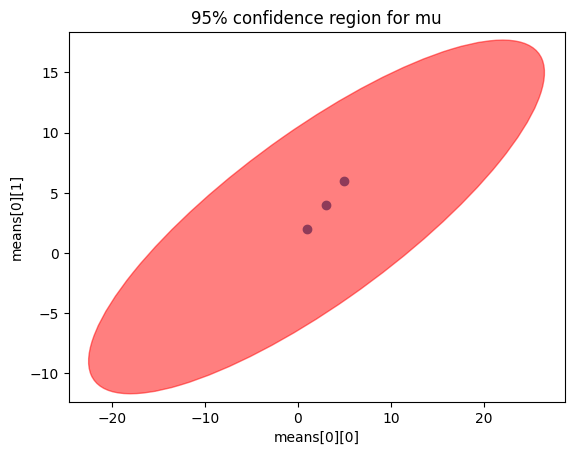

In [136]:
# <Vaš kôd ovdje>
eigenvalues2, eigenvectors2 = np.linalg.eig(sigma_cov2)
print("Eigenvalues:",eigenvalues2)
print("Eigenvectors:",eigenvectors2)

angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
print("Angle:",angle)

width = 2 * np.sqrt(stats.chi2.ppf(0.95, 2)) * np.sqrt(eigenvalues2[0])
height = 2 * np.sqrt(stats.chi2.ppf(0.95, 2)) * np.sqrt(eigenvalues2[1])

ell = Ellipse(xy=means2.flatten(), width=width, height=height, angle=angle, edgecolor='r', facecolor='red',alpha=0.5)

plt.scatter(data[:, 0], data[:, 1])
plt.gca().add_patch(ell)

plt.xlabel('means[0][0]')
plt.ylabel('means[0][1]')
#plt.xlim(-30, 30) 
#plt.ylim(-20, 20)
plt.title('95% confidence region for mu')

plt.show()


#### (c)

Uz pomoć simultanih intervala pouzdanosti ($T^2$-interval), odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli, $\mu_1$ i $\mu_2$, te njihovu razliku $\mu_2 - \mu_1$.

In [142]:
# <Vaš kôd ovdje>
p = 2  

T_squared = Hotelling_T2(data, means2, n_samples2, sigma_cov2)
critical_value = stats.f.ppf(1 - alpha, p, n_samples2 - p)

confidence_region = np.sqrt((p * (n_samples2 - 1) * critical_value) / (n_samples2 * (n_samples2 - p))) * np.sqrt(np.diag(sigma_cov2))

confidence_interval_mu1 = [means2[0][0] - confidence_region[0], means2[0][0] + confidence_region[0]]
confidence_interval_mu2 = [means2[0][1] - confidence_region[1], means2[0][1] + confidence_region[1]]
confidence_interval_diff = [confidence_interval_mu2[0] - confidence_interval_mu1[1], confidence_interval_mu2[1] - confidence_interval_mu1[0]]

print("95% confidence interval (mu1):", confidence_interval_mu1)
print("95% confidence interval (mu2):", confidence_interval_mu2)
print("95% confidence interval (mu2 - mu1):", confidence_interval_diff)


95% confidence interval (mu1): [1.22440300971923, 2.77559699028077]
95% confidence interval (mu2): [2.534641805831538, 3.465358194168462]
95% confidence interval (mu2 - mu1): [-0.24095518444923192, 2.240955184449232]


Izračunajte univarijatni $t$-interval pouzdanosti za srednju vrijednost svake varijable, a zatim i Bonferronijevu korekciju $t$-intervala. Usporedite s rezultatima dobivenim pomoću $T^2$-intervala.

In [186]:
# <Vaš kôd ovdje>

t_interval_var1 = stats.t.interval(1 - alpha, df=n_samples2-1, loc=np.mean(data[:, 0]))
t_interval_var2 = stats.t.interval(1 - alpha, df=n_samples2-1, loc=np.mean(data[:, 1]))

bonferroni_alpha = alpha / 2  # Bonferroni korekcija 2 var
bonferroni_t_interval_var1 = stats.t.interval(1 - bonferroni_alpha, df=n_samples2-1, loc=np.mean(data[:, 0]))
bonferroni_t_interval_var2 = stats.t.interval(1 - bonferroni_alpha, df=n_samples2-1, loc=np.mean(data[:, 1]))

print("Univariate t-confidence interval (mu1):", t_interval_var1)
print("Univariate t-confidence interval (mu2):", t_interval_var2)
print("Bonferroni-corrected (mu1):", bonferroni_t_interval_var1)
print("Bonferroni-corrected (mu2):", bonferroni_t_interval_var2)


Univariate t-confidence interval (mu1): (3.880991872199885, 7.805674794466782)
Univariate t-confidence interval (mu2): (1.094991872199885, 5.019674794466782)
Bonferroni-corrected (mu1): (3.5985468296288095, 8.08811983703786)
Bonferroni-corrected (mu2): (0.8125468296288094, 5.30211983703786)


Izračunajte $\tilde{\chi}^2$ interval pouzdanosti za velike uzorke za srednju vrijednost svake varijable. Usporedite dobivenu vrijednost s prethodno dobivenim vrijednostima.

In [153]:
# <Vaš kôd ovdje>
chisq_cvalue = stats.chi2.ppf(1 - alpha,2)
chi_sq_confidence_region = np.sqrt(chisq_cvalue) * np.sqrt(np.diag(sigma_cov2) / n_samples2)

chi_sq_confidence_interval_mu1 = [means2[0][0] - chi_sq_confidence_region[0], means2[0][0] + chi_sq_confidence_region[0]]
chi_sq_confidence_interval_mu2 = [means2[0][1] - chi_sq_confidence_region[1], means2[0][1] + chi_sq_confidence_region[1]]

print("Chi-squared confidence interval (mu1)",chi_sq_confidence_interval_mu1)
print("Chi-squared confidence interval (mu2)",chi_sq_confidence_interval_mu2)


Chi-squared confidence interval (mu1) [1.2259544879590103, 2.7740455120409897]
Chi-squared confidence interval (mu2) [2.535572692775406, 3.464427307224594]


U idućem zadatku ćete provesti ostatak naučenih metoda vezano uz statističko zaključivanje o više vektora sredine.

### 4. Primjena implementiranih metoda

Učitajte podatkovni skup [*iris*](https://archive.ics.uci.edu/ml/datasets/Iris) (postoji mogućnost i učitavanja unutar jezika - [Python](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) / [R](https://technicaljockey.com/r-programming-training/loading-iris-data-set-in-r/)).

In [167]:
# <Vaš kôd ovdje>
iris_dataset = sklearn.datasets.load_iris()
#iris_dataset['data'][:,0] stupac

Procijenite parametre $\mathbf{\mu},\mathbf{\Sigma}$ vezane uz 4 numeričke varijable.

In [170]:
# <Vaš kôd ovdje>
sepalLength = iris_dataset['data'][:,0]
sepalWidth = iris_dataset['data'][:,1]
petalLength = iris_dataset['data'][:,2]
petalWidth = iris_dataset['data'][:,3]

irisMeans = [np.mean(sepalLength),np.mean(sepalWidth),np.mean(petalLength),np.mean(petalWidth)]
print("Iris means:",irisMeans)

irisCovariance = np.cov(iris_dataset['data'], rowvar=False) 

print("Covariance matrix:")
print(irisCovariance)

Iris means: [5.843333333333334, 3.0573333333333337, 3.7580000000000005, 1.1993333333333336]
Covariance matrix:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


Provedite analizu normalnosti 4 numeričkih varijabli. Ukoliko je potrebno, predložite koje transformacije biste radili na podatcima kako biste ojačali pretpostavke normalnosti u skupu. 

In [176]:
# <Vaš kôd ovdje>
# koristim Shapiro - wilk test

for i, variable in enumerate(iris_dataset.feature_names):
    statistic, p_value = shapiro(iris_dataset.data[:, i])
    print(f"Variable '{variable}':")
    print(f"  Shapiro-Wilk Test Statistic: {statistic:.4f}")
    print(f"  p-value: {p_value:.4f}")
    if p_value > 0.05: # nivo pouzdanosti 0.95
        print("  Conclusion: Variable appears to be normally distributed.")
    else:
        print("  Conclusion: Variable does not appear to be normally distributed.")
    print(" ")

Variable 'sepal length (cm)':
  Shapiro-Wilk Test Statistic: 0.9761
  p-value: 0.0102
  Conclusion: Variable does not appear to be normally distributed.

Variable 'sepal width (cm)':
  Shapiro-Wilk Test Statistic: 0.9849
  p-value: 0.1011
  Conclusion: Variable appears to be normally distributed.

Variable 'petal length (cm)':
  Shapiro-Wilk Test Statistic: 0.8763
  p-value: 0.0000
  Conclusion: Variable does not appear to be normally distributed.

Variable 'petal width (cm)':
  Shapiro-Wilk Test Statistic: 0.9018
  p-value: 0.0000
  Conclusion: Variable does not appear to be normally distributed.



Provedite detekciju stršećih vrijednosti (vizualno/numerički).

**Hint**: Poglavlje 4.7 (Johnson)

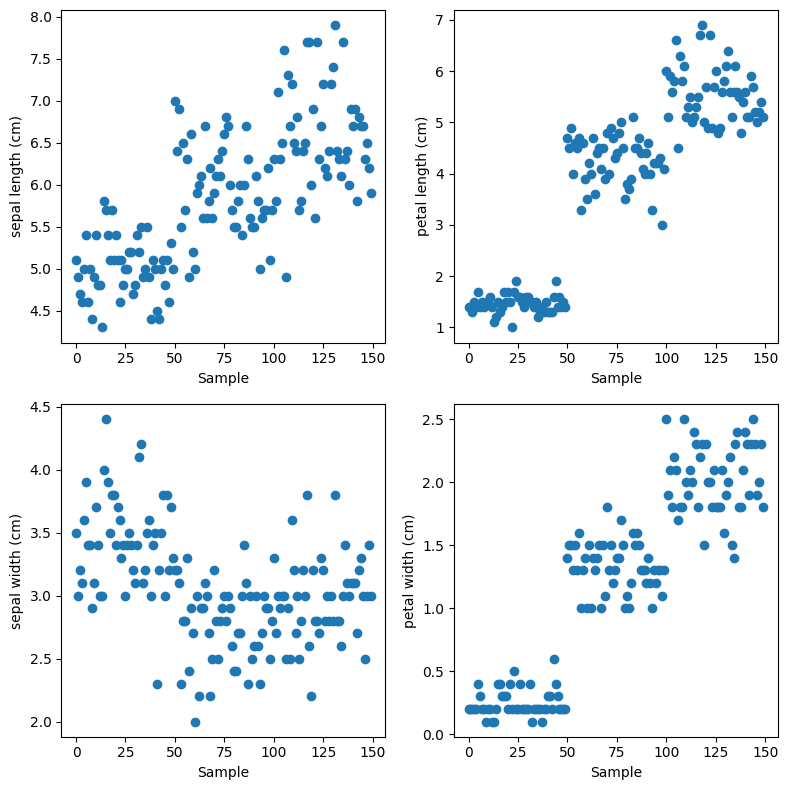

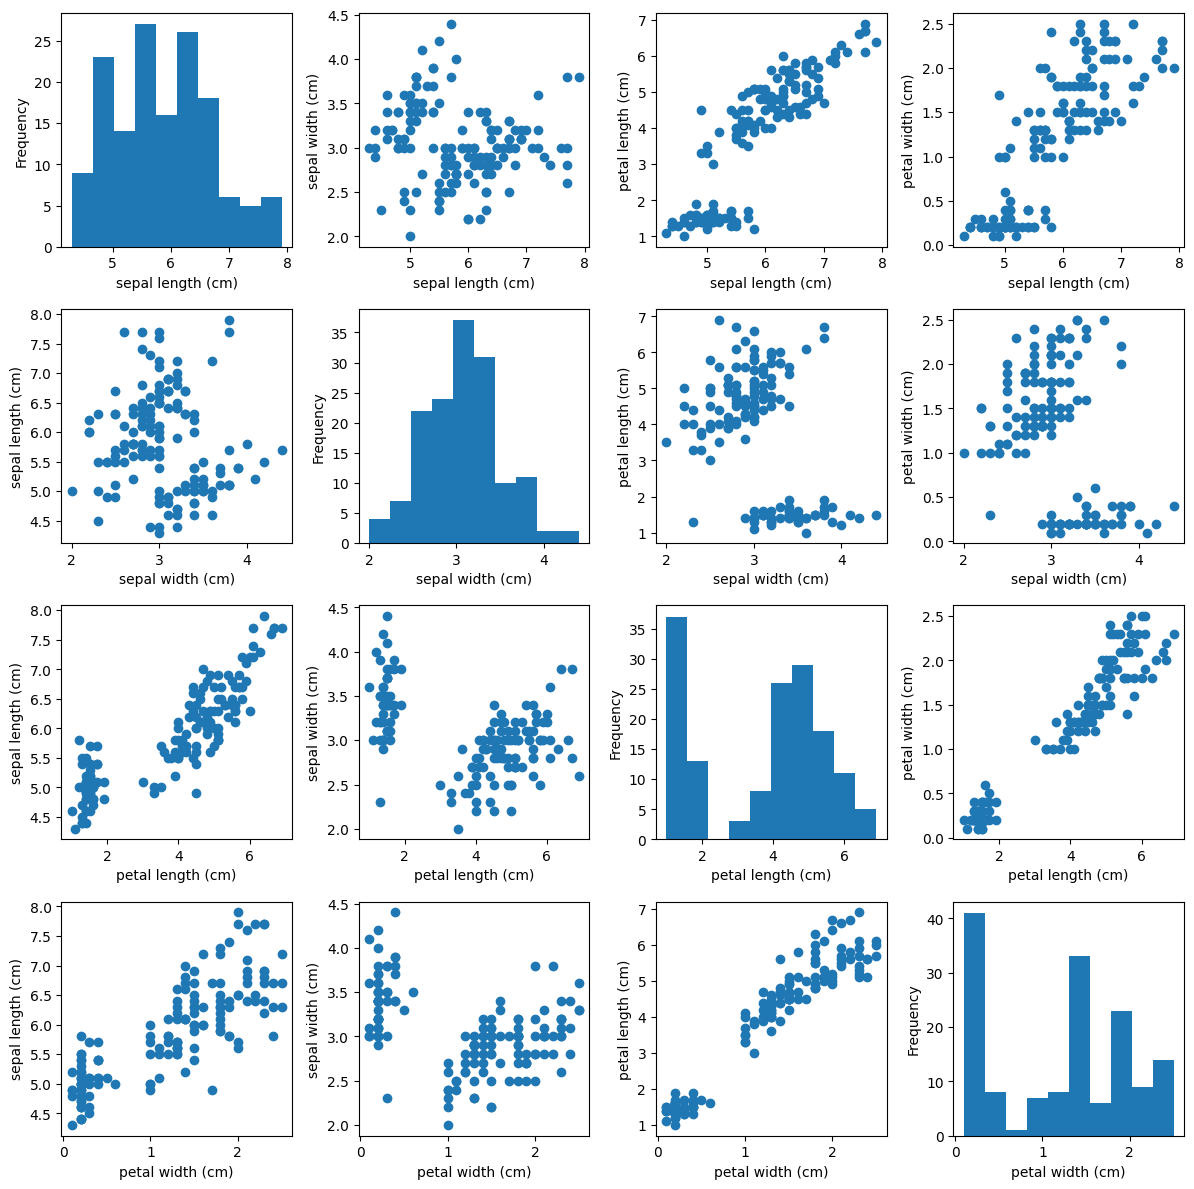

In [188]:
data = iris_dataset.data
feature_names = iris_dataset.feature_names


# Johnson step 1: dot plots

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        axes[i, j].plot(data[:, i+j*2], 'o')
        axes[i, j].set_xlabel("Sample")
        axes[i, j].set_ylabel(feature_names[i+j*2])

plt.tight_layout()
plt.show()

# Johnson 2 : Variable pair scatter plots

fig, axes = plt.subplots(4,4, figsize=(12, 12))

for i in range(4):
    for j in range(4):
        if i == j:
            
            axes[i, j].hist(data[:, i], bins=10)
            axes[i, j].set_xlabel(feature_names[i])
            axes[i, j].set_ylabel("Frequency")
        else:
            
            axes[i, j].scatter(data[:, i], data[:, j])
            axes[i, j].set_xlabel(feature_names[i])
            axes[i, j].set_ylabel(feature_names[j])


plt.tight_layout()
plt.show()


In [208]:
# Johnson 3. 

irisStds = [np.std(sepalLength),np.std(sepalWidth),np.std(petalLength),np.std(petalWidth)]

z_scores = (iris_dataset['data'] - irisMeans) / irisStds

#print(z_scores)
outlier_treshhold = 3 # 2.5
outliers = np.abs(z_scores) > outlier_treshhold  
outliers_indices = np.argwhere(outliers)

print("Outliers:")
print(outliers)
#print(outliers_indices) 

print("Outliers:")
for variable_index, outlier_indices in enumerate(outliers.T):
    variable_name = iris_dataset.feature_names[variable_index]
    outliers_for_variable = np.where(outlier_indices)[0]
    for outlier_index in outliers_for_variable:
        print(f"Sample {outlier_index + 1} for variable '{variable_name}' - Z-score: {z_scores[outlier_index, variable_index]:.2f}")


Outliers:
[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False Fals

Odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli.

**Hint**: Prethodno implementirani $T^2$-interval/ $t$-interval/ Bonferroni

In [210]:
# <Vaš kôd ovdje>
n_samples3 = len(petalLength)
p2 = 4

critical_value2 = stats.f.ppf(1 - alpha, p2, n_samples3 - p2)
confidence_region2 = np.sqrt((p2 * (n_samples3 - 1) * critical_value2) / (n_samples3 * (n_samples3 - p2))) * np.sqrt(np.diag(irisCovariance))

confidence_interval_sepalLength = [irisMeans[0] - confidence_region[0], irisMeans[0] + confidence_region2[0]]
confidence_interval_sepalWidth = [irisMeans[1] - confidence_region[1], irisMeans[1] + confidence_region2[1]]
confidence_interval_petalLength = [irisMeans[2] - confidence_region[0], irisMeans[2]+ confidence_region2[2]]
confidence_interval_petalWidth = [irisMeans[3] - confidence_region[1], irisMeans[3] + confidence_region2[3]]

print("95% confidence interval (sepalLength):",confidence_interval_sepalLength)
print("95% confidence interval (sepalWidth):",confidence_interval_sepalWidth)
print("95% confidence interval (petalLength):",confidence_interval_petalLength)
print("95% confidence interval (petalWidth):",confidence_interval_petalWidth)

95% confidence interval (sepalLength): [5.067736343052564, 6.056438350982844]
95% confidence interval (sepalWidth): [2.5919751391648718, 3.1695046795651702]
95% confidence interval (petalLength): [2.9824030097192304, 4.212304189538669]
95% confidence interval (petalWidth): [0.7339751391648717, 1.3954972221927728]


Razmatramo *species: virginica* populaciju. Razlikuju li se  *sepal* __length__ i __width__ varijable od *petal* __length__ i __width__ varijabli (duljina i širina sepala i papučica - dijelovi reproduktivnog sustava cvijeta)?

**Hint**: Metoda uparenih usporedbi

In [211]:

# <Vaš kôd ovdje>
virginica_data = iris_dataset.data[iris_dataset.target == 2]

sepal_length_v = virginica_data[:, 0]
sepal_width_v = virginica_data[:, 1]

petal_length_v = virginica_data[:, 2]
petal_width_v = virginica_data[:, 3]

sepal_petal_diff_length = sepal_length_v - petal_length_v
sepal_petal_diff_width = sepal_width_v - petal_width_v

t_statistic_length, p_value_length = stats.ttest_rel(sepal_length_v, petal_length_v)
t_statistic_width, p_value_width = stats.ttest_rel(sepal_width_v, petal_width_v)

print("Paired t-test results for sepal length and petal length:")
print("t-statistic:", t_statistic_length)
print("p-value:", p_value_length)
print(" ")
print("Paired t-test results for sepal width and petal width:")
print("t-statistic:", t_statistic_width)
print("p-value:", p_value_width)


Paired t-test results for sepal length and petal length:
t-statistic: 22.8980589536387
p-value: 7.985259485031611e-28
 
Paired t-test results for sepal width and petal width:
t-statistic: 23.104146605753257
p-value: 5.339057365526556e-28


**Bonus**: Postoji li dodatno istraživačko pitanje koje želite testirati?

In [ ]:
# <Vaš kôd ovdje>
